In [ ]:
import os
import random
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

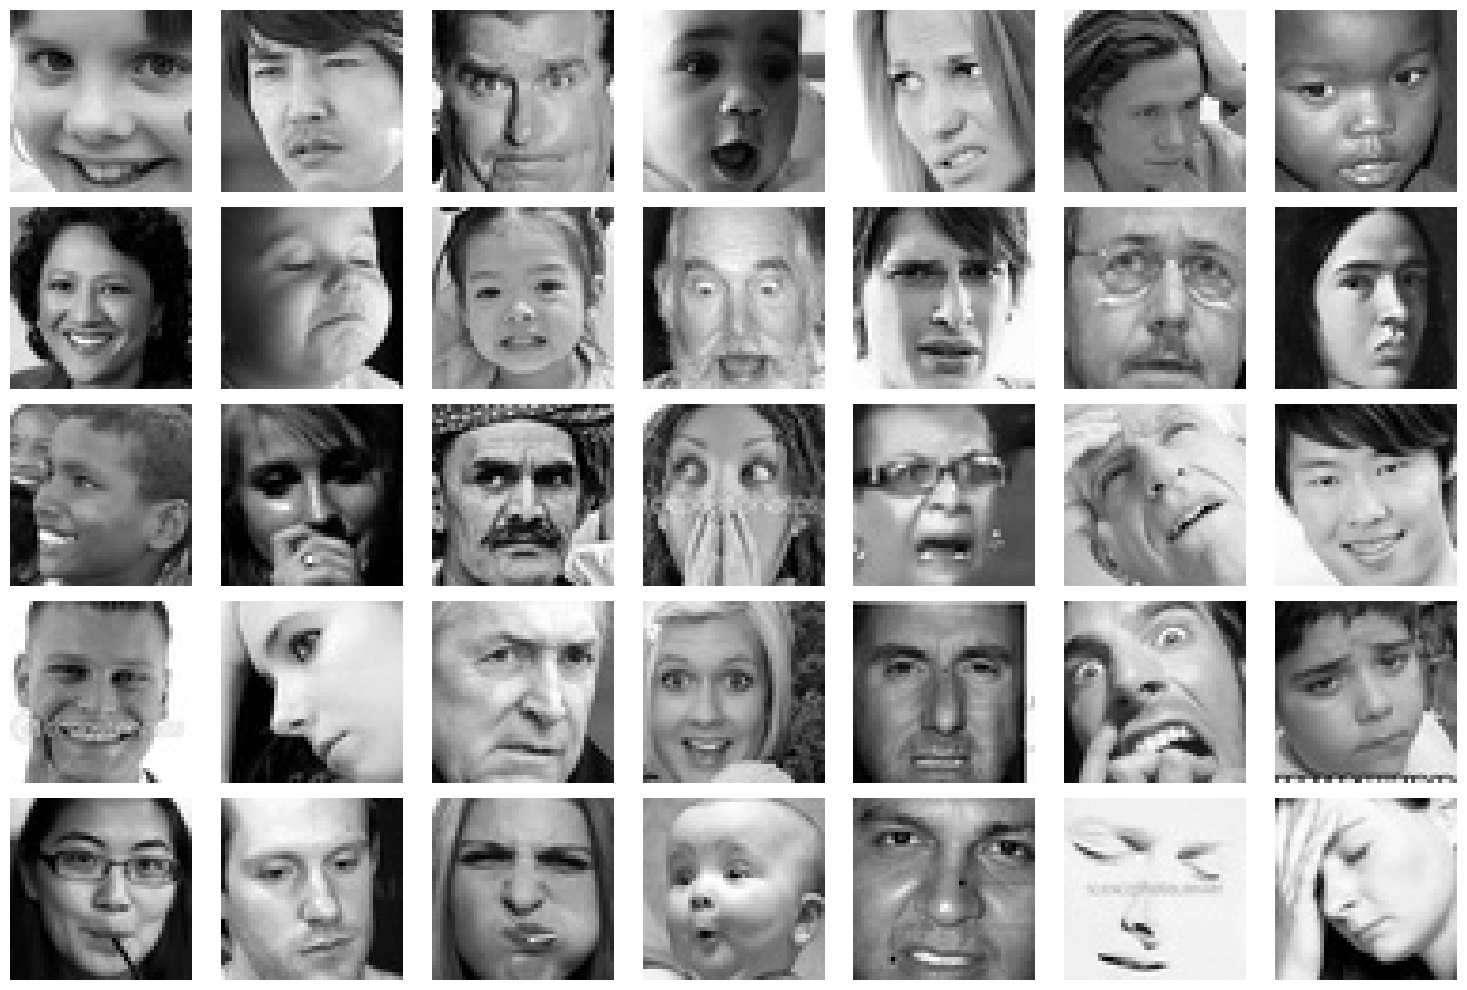

In [2]:
folders = ['dataset/images/train/happy', 'dataset/images/train/sad', 'dataset/images/train/angry', 'dataset/images/train/surprise', 'dataset/images/train/disgust', 'dataset/images/train/fear', 'dataset/images/train/neutral']

images = []

num_samples = 5

for folder in folders:
    folder_images = []
    all_files = [f for f in os.listdir(folder) if f.endswith('.jpg') or f.endswith('.png')]  # Adjust extensions as needed
    sampled_files = random.sample(all_files, num_samples)
    for filename in sampled_files:
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path)
        folder_images.append(img)
    images.append(folder_images)

fig, axes = plt.subplots(num_samples, len(folders), figsize=(15, 2 * num_samples))

for col, folder_images in enumerate(images):
    for row in range(num_samples):
        ax = axes[row, col]  # Access subplot
        ax.axis('off')  # Hide axes
        ax.imshow(folder_images[row], cmap='grey')


plt.tight_layout()
plt.show()


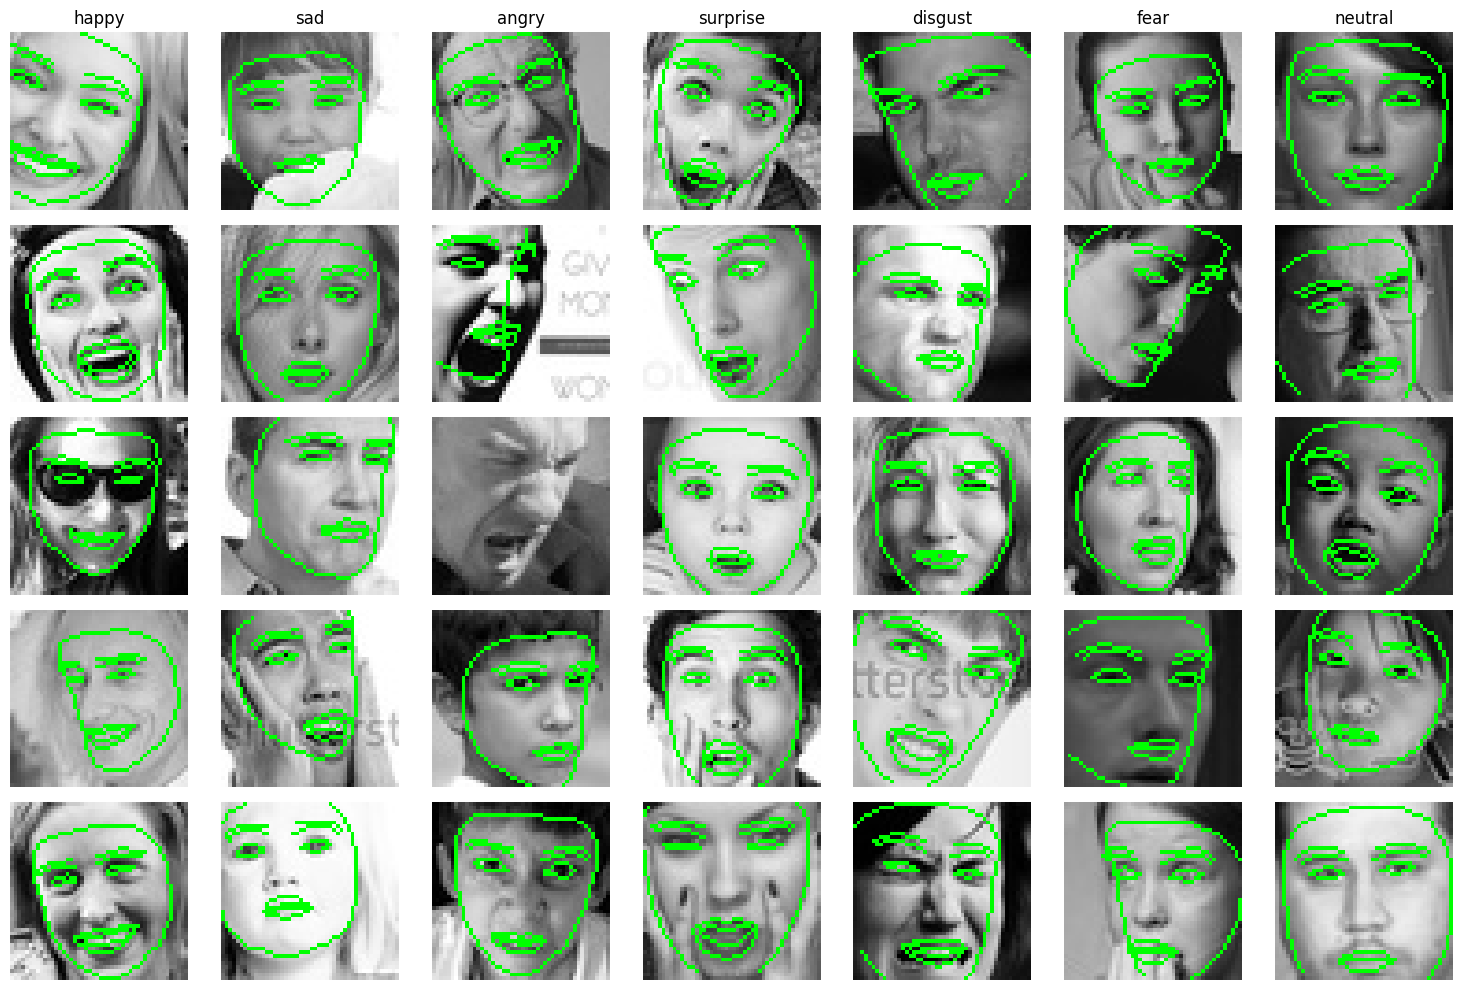

In [27]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

folders = ['dataset/images/train/happy', 'dataset/images/train/sad', 'dataset/images/train/angry', 'dataset/images/train/surprise', 'dataset/images/train/disgust', 'dataset/images/train/fear', 'dataset/images/train/neutral']

num_samples = 5

def process_image(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = holistic.process(img_rgb)

    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image=img,
            landmark_list=results.face_landmarks,
            connections=mp_holistic.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1)
        )
    
    return img

images = []

for folder in folders:
    folder_images = []
    all_files = [f for f in os.listdir(folder) if f.endswith('.jpg') or f.endswith('.png')]
    sampled_files = random.sample(all_files, num_samples)
    for filename in sampled_files:
        img_path = os.path.join(folder, filename)
        processed_img = process_image(img_path)
        processed_img_rgb = cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB)
        folder_images.append(processed_img_rgb)
    images.append(folder_images)

fig, axes = plt.subplots(num_samples, len(folders), figsize=(15, 2 * num_samples))

for col, folder_images in enumerate(images):
    for row in range(num_samples):
        ax = axes[row, col]
        ax.axis('off')
        ax.imshow(folder_images[row])

for col, folder in enumerate(folders):
    axes[0, col].set_title(folder.capitalize().split('/')[-1])

plt.tight_layout()
plt.show()

holistic.close()
